# Import Data fro Google Colab

In [ ]:
# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation
# Stop using keras package as it's migrated into tensorflow
# from keras.models import Sequential
# from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import IPython

import warnings

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Please authorize your code in the prompted Chrome tab and paste the Application code here
# You need to upload the price.csv and pricepersqft.csv into your Google Drive in /Colab path
# Everyone needs to do this (auth + upload)
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/Colab/price.csv')
df2 = pd.read_csv('/content/drive/My Drive/Colab/pricepersqft.csv')
df1.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,November 2011,December 2011,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,October 2012,November 2012,December 2012,January 2013,February 2013,March 2013,April 2013,May 2013,June 2013,July 2013,August 2013,...,October 2013,November 2013,December 2013,January 2014,February 2014,March 2014,April 2014,May 2014,June 2014,July 2014,August 2014,September 2014,October 2014,November 2014,December 2014,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,November 2015,December 2015,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1746.0,1752.0,1764.0,1778.0,1792,1804,1813,1814,1810,1805,1806,1817,1831,1851,1870,1888,1901,1918,1941,1968,1987,...,2004,2014,2026,2040,2052,2058,2064,2071,2080,2104,2132,2169,2191,2206,2214,2216,2229,2241,2248,2253,2251,2246,2259,2276,2304,2322,2334,2335,2331,2329,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,2189.0,2189.0,2188.0,2191.0,2189.0,2186.0,2183.0,2183.0,2182.0,2178.0,2172.0,2175.0,2177.0,2183,2186,2190,2192,2189,2189,2185,2183,2186,2194,2203,2212,2222,2229,2236,2239,2246,...,2267,2278,2283,2285,2283,2285,2283,2285,2288,2303,2320,2343,2367,2395,2423,2445,2464,2479,2493,2502,2511,2521,2536,2546,2555,2564,2577,2596,2607,2622,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,1526.0,1517.0,1507.0,1497.0,1493.0,1491.0,1489.0,1485.0,1480.0,1483.0,1484.0,1485.0,1489.0,1494,1496,1493,1491,1491,1498,1509,1513,1517,1514,1511,1512,1527,1544,1560,1562,1568,...,1584,1585,1593,1606,1616,1619,1614,1612,1615,1628,1636,1649,1658,1672,1677,1677,1668,1668,1669,1667,1668,1670,1668,1660,1652,1649,1653,1668,1671,1682,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,1203.0,1205.0,1204.0,1199.0,1194.0,1190.0,1188.0,1186.0,1188.0,1190.0,1194.0,1196.0,1199.0,1200,1199,1197,1193,1193,1197,1201,1203,1199,1201,1208,1218,1227,1236,1248,1258,1265,...,1277,1287,1295,1297,1296,1293,1294,1296,1301,1310,1322,1334,1344,1355,1367,1377,1384,1389,1394,1402,1410,1419,1425,1428,1428,1429,1431,1436,1439,1442,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,1080.0,1080.0,1083.0,1082.0,1082.0,1085.0,1095.0,1098.0,1094.0,1085.0,1080.0,1083.0,1087.0,1091,1092,1094,1096,1095,1092,1090,1089,1087,1083,1081,1083,1089,1093,1095,1094,1093,...,1083,1082,1085,1092,1098,1105,1108,1108,1106,1111,1121,1136,1150,1164,1175,1182,1185,1183,1178,1176,1179,1179,1177,1175,1179,1184,1189,1196,1200,1205,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


Doc: 
https://docs.google.com/document/d/1kZitXuILhKllQ9FswXmvXKwXfS9pUMC6MPxIUBW-SPw/edit

In [ ]:
df2.head(3)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,November 2011,December 2011,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,October 2012,November 2012,December 2012,January 2013,February 2013,March 2013,April 2013,May 2013,June 2013,July 2013,August 2013,...,October 2013,November 2013,December 2013,January 2014,February 2014,March 2014,April 2014,May 2014,June 2014,July 2014,August 2014,September 2014,October 2014,November 2014,December 2014,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,November 2015,December 2015,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.390,1.388,1.392,1.396,1.402,1.412,1.420,1.424,1.422,1.420,1.426,1.442,1.458,1.468,1.478,1.486,1.496,1.502,1.510,1.518,1.526,...,1.544,1.552,1.558,1.568,1.582,1.592,1.600,1.604,1.612,1.630,1.650,1.672,1.682,1.690,1.690,1.692,1.700,1.708,1.718,1.726,1.736,1.740,1.752,1.764,1.780,1.788,1.792,1.794,1.800,1.804,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,1.578,1.578,1.580,1.582,1.586,1.588,1.590,1.594,1.594,1.594,1.592,1.590,1.592,1.592,1.590,1.588,1.588,1.588,1.590,1.588,1.590,1.588,1.592,1.594,1.598,1.602,1.608,1.616,1.622,1.628,1.634,1.640,1.648,1.656,...,1.672,1.676,1.682,1.680,1.680,1.678,1.682,1.688,1.696,1.708,1.720,1.738,1.760,1.780,1.800,1.816,1.834,1.850,1.862,1.870,1.878,1.888,1.900,1.908,1.914,1.920,1.930,1.948,1.962,1.978,1.990,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056,2.064
2,17426,Chicago,Chicago,Cook,IL,3,1.244,1.248,1.254,1.254,1.248,1.240,1.232,1.224,1.220,1.212,1.206,1.194,1.188,1.180,1.176,1.174,1.174,1.176,1.178,1.182,1.188,1.184,1.182,1.186,1.198,1.202,1.198,1.200,1.204,1.214,1.222,1.232,1.232,1.236,...,1.252,1.264,1.272,1.280,1.286,1.286,1.280,1.276,1.272,1.274,1.282,1.292,1.296,1.304,1.302,1.302,1.298,1.304,1.306,1.308,1.310,1.316,1.322,1.326,1.328,1.330,1.332,1.338,1.340,1.346,1.354,1.362,1.370,1.374,1.378,1.380,1.380,1.380,1.376,1.374


In [ ]:
df2.isnull().sum().sort_values(ascending=False)

December 2010    1319
January 2011     1319
November 2010    1319
February 2011    1175
March 2011       1090
                 ... 
November 2014       0
December 2014       0
January 2015        0
February 2015       0
City Code           0
Length: 81, dtype: int64

# Analysis

## Exploring the Data Set

### Minimum, Maximum of sample columns

In [ ]:
print('The min/max value for each column in price.csv (USD)')
print()
for col_name, col in df1.iloc[:,60:].iteritems():

  print(f'Column: {col_name}      -   Min: {col.min()};     Max: {col.max()}')


The min/max value for each column in price.csv (USD)

Column: May 2015      -   Min: 514;     Max: 21089
Column: June 2015      -   Min: 517;     Max: 21397
Column: July 2015      -   Min: 519;     Max: 21525
Column: August 2015      -   Min: 525;     Max: 21621
Column: September 2015      -   Min: 530;     Max: 21640
Column: October 2015      -   Min: 530;     Max: 21912
Column: November 2015      -   Min: 520;     Max: 22116
Column: December 2015      -   Min: 513;     Max: 22244
Column: January 2016      -   Min: 516;     Max: 22113
Column: February 2016      -   Min: 522;     Max: 22176
Column: March 2016      -   Min: 535;     Max: 21892
Column: April 2016      -   Min: 543;     Max: 21344
Column: May 2016      -   Min: 548;     Max: 20547
Column: June 2016      -   Min: 547;     Max: 20400
Column: July 2016      -   Min: 544;     Max: 20639
Column: August 2016      -   Min: 539;     Max: 20695
Column: September 2016      -   Min: 532;     Max: 20615
Column: October 2016      -  

### Mean, Median, Standard Deviation of the sample columns

In [ ]:
print()
print('Mean, Median, Standard Deviation')
print()
sample_columns = df1.iloc[:,60:]
means = []
medians = []
for col_name, col in sample_columns.iteritems():
  means.append(col.mean())
  medians.append(col.median())
  print(f'Column: {col_name}      -   Mean: {col.mean()};     Median: {col.median()}    Std: {col.std()} ')


Mean, Median, Standard Deviation

Column: May 2015      -   Mean: 1430.87350544513;     Median: 1249.0    Std: 772.6435985006784 
Column: June 2015      -   Mean: 1438.3359987815095;     Median: 1253.0    Std: 778.9529478838957 
Column: July 2015      -   Mean: 1445.1816312542837;     Median: 1259.0    Std: 784.584029276271 
Column: August 2015      -   Mean: 1449.6798415962228;     Median: 1264.0    Std: 789.3242486706808 
Column: September 2015      -   Mean: 1450.0686924072804;     Median: 1264.0    Std: 794.0623480847108 
Column: October 2015      -   Mean: 1447.9284136775568;     Median: 1260.0    Std: 799.8863260208489 
Column: November 2015      -   Mean: 1446.2704287563781;     Median: 1258.0    Std: 806.1510916303139 
Column: December 2015      -   Mean: 1445.522351686848;     Median: 1254.0    Std: 810.9498227969617 
Column: January 2016      -   Mean: 1449.7486101591653;     Median: 1259.0    Std: 814.5384384544951 
Column: February 2016      -   Mean: 1454.7484578478409;  

## Overall Data Analysis and Visualisation

### Number of cities for all states

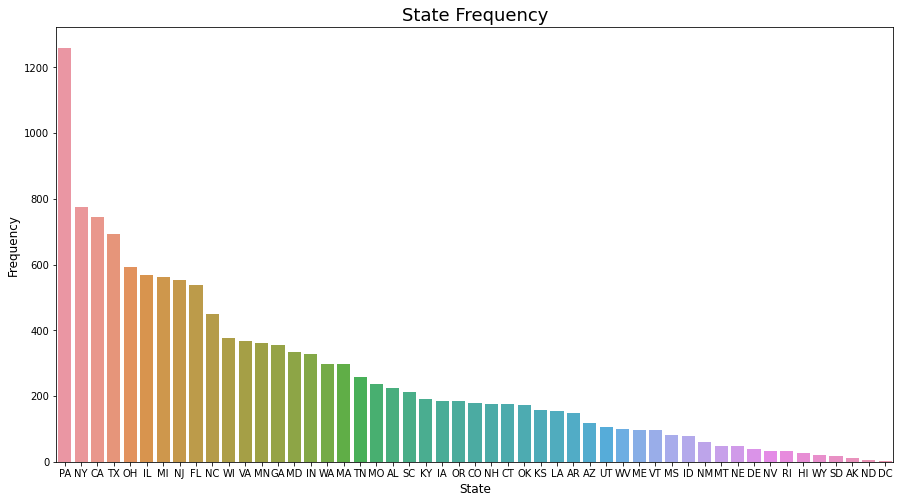

In [ ]:
# Chart 1.1: Number of cities for all states
plt.figure(figsize = (15, 8))
state_count = df1["State"].value_counts()
sns.barplot(state_count.index, state_count.values, order = state_count.index)
plt.xlabel("State", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.title("State Frequency", fontsize = 18)
plt.show()

### Median Rental listing for all states per month

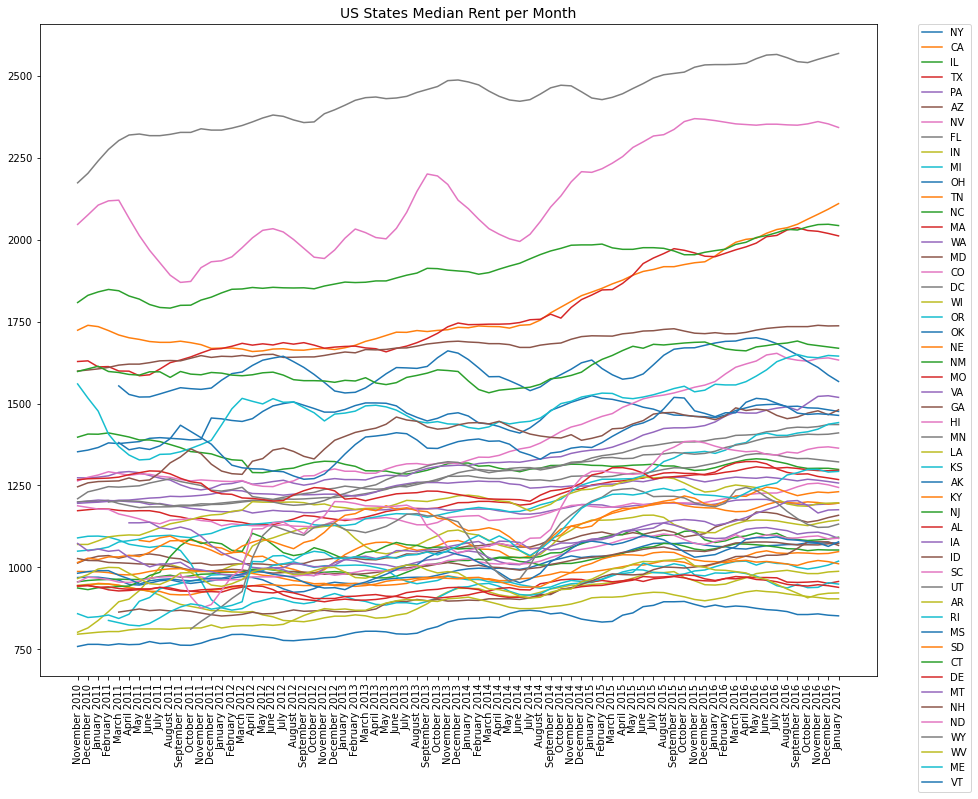

In [ ]:
# Chart 2.1: Median Rental listing for all states per month
states = list(df1["State"].unique())
months = df1.columns[6:]

plt.figure(figsize = (15, 12))
for state in states:
    price = df1[df1["State"] == state]
    price = price[months]
    with warnings.catch_warnings():
      warnings.simplefilter("ignore", category=RuntimeWarning)
      plt.plot(months, np.nanmedian(price, axis = 0), label = state)
    
    
plt.title("US States Median Rent per Month", fontsize = 14)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

### Rental listing of cities with the largest population in all states

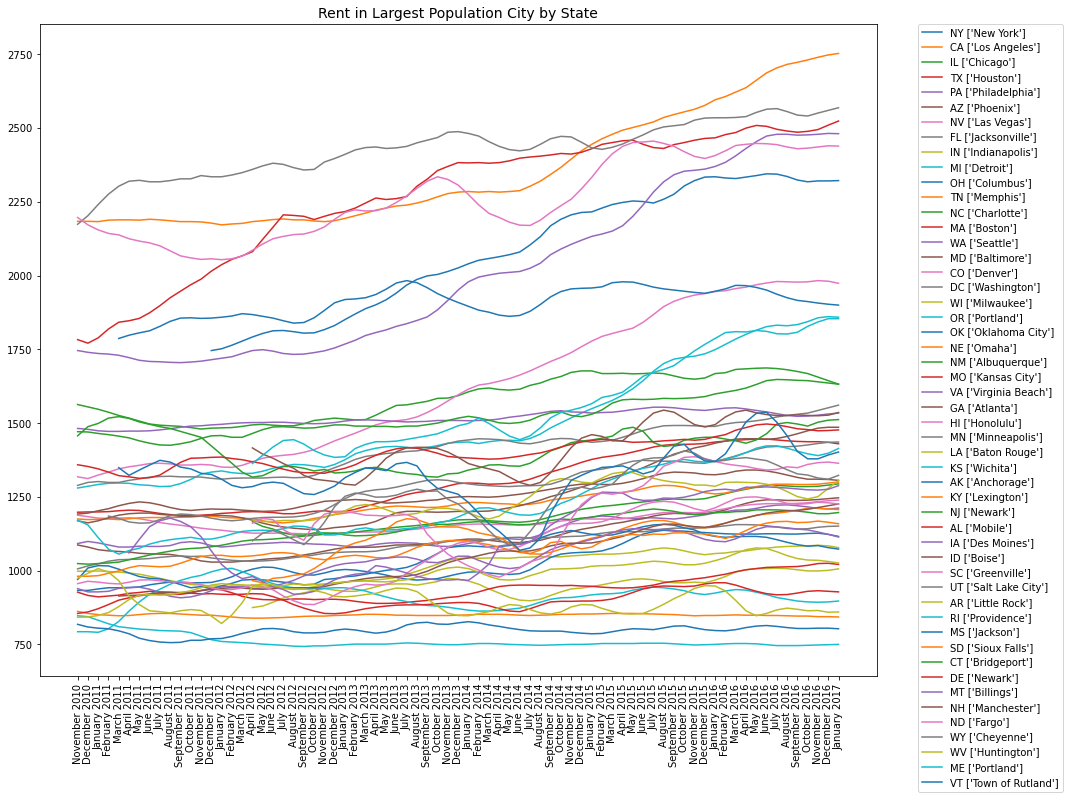

In [ ]:
# Chart 3.1: Rental listing of cities with the largest population in all states
plt.figure(figsize = (15, 12))
for state in states:
    price = df1[df1["State"] == state]
    rank = min(price["Population Rank"])
    price = price[price["Population Rank"] == rank]
    label = "{} {}".format(state, price["City"].unique())
    price = price[months]
    plt.plot(price.columns, np.transpose(price.values), label = label)
    
plt.title("Rent in Largest Population City by State", fontsize = 14)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

### US Top 15 city’s distribution with highest listing

There are 9670 cities in US


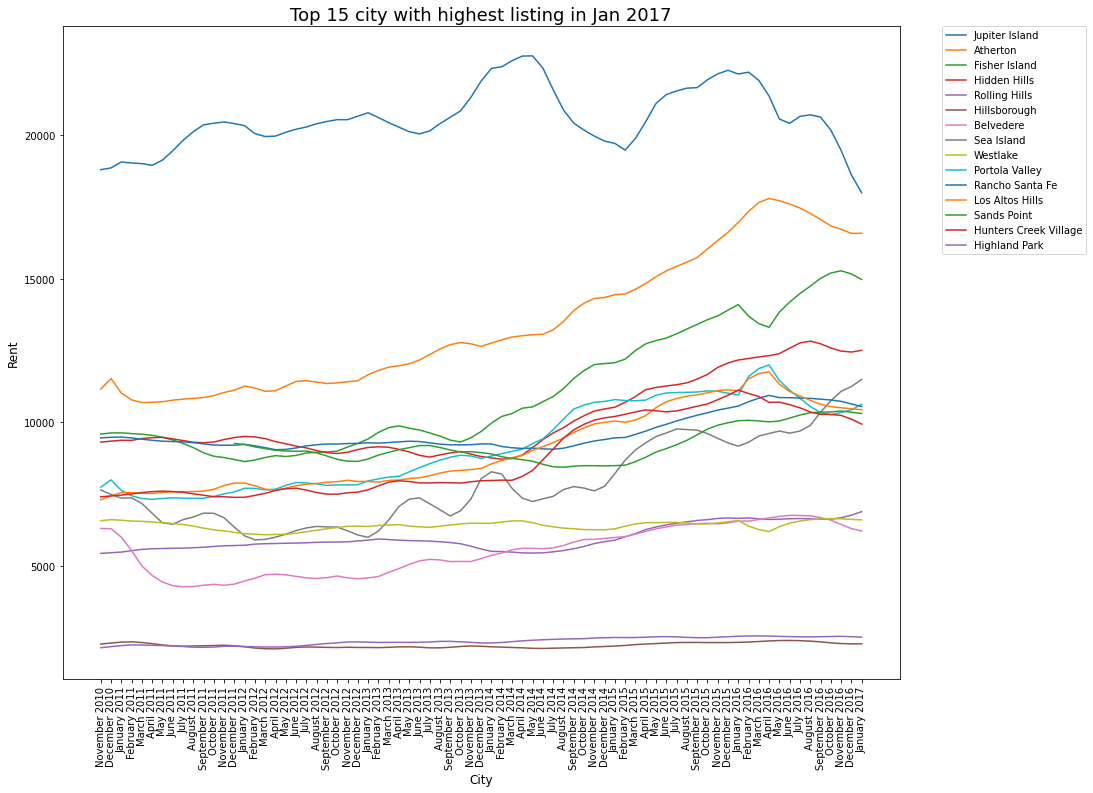

In [ ]:
print("There are {} cities in US".format(len(df1["City"].unique())))
import warnings
months = df1.columns[6:]
sorted_latest_price = df1.sort_values(by=['January 2017'], ascending=False)
top = sorted_latest_price[:15]
cities = list(top["City"].unique())

plt.figure(figsize = (15, 12))
for city in cities:
    price = sorted_latest_price[sorted_latest_price["City"] == city]
    price = price[months]
    with warnings.catch_warnings():
      warnings.simplefilter("ignore", category=RuntimeWarning)
      plt.plot(months, np.nanmedian(price, axis = 0), label = city)
plt.title("Top 15 city with highest listing in Jan 2017", fontsize = 18)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.xlabel("City", fontsize = 12)
plt.ylabel("Rent", fontsize = 12)
plt.show()

### US Top 15 Metro’s distribution with highest listing

There are 702 Metros in US


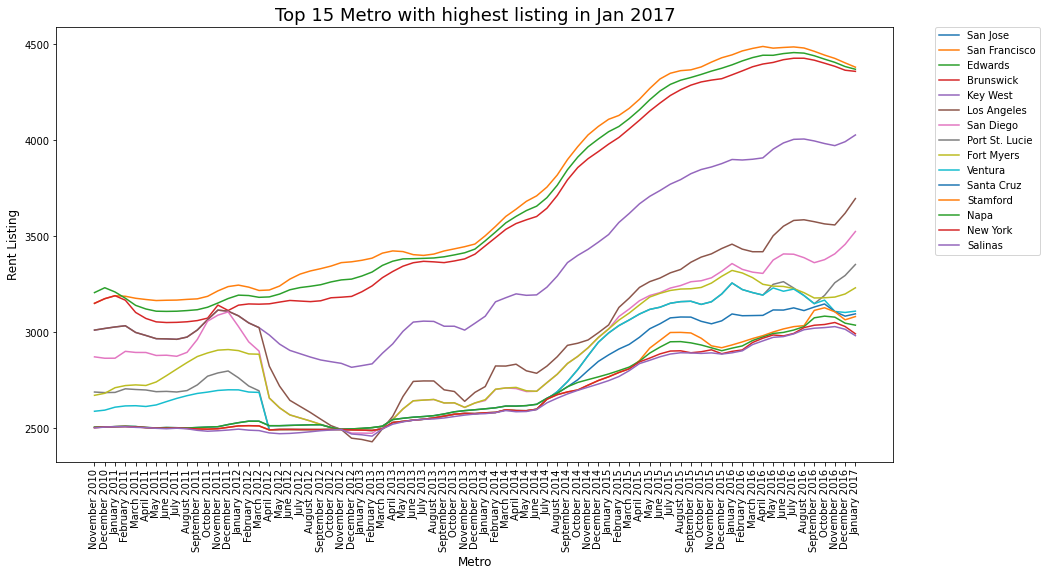

In [ ]:
print("There are {} Metros in US".format(len(df1["Metro"].unique())))
metro_highest = df1.groupby(['Metro']).mean()
sorted_metro_highest = metro_highest.sort_values(by=['January 2017'], ascending=False)

months = df1.columns[6:]
plt.figure(figsize = (15, 8))

for c in range (0,15):
    price = sorted_metro_highest.iloc[:c]
    price = price[months]
    with warnings.catch_warnings():
      warnings.simplefilter("ignore", category=RuntimeWarning)
      plt.plot(months, np.nanmedian(price, axis = 0), label = sorted_metro_highest.index[c])
plt.title("Top 15 Metro with highest listing in Jan 2017", fontsize = 18)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.xlabel("Metro", fontsize = 12)
plt.ylabel("Rent Listing", fontsize = 12)
plt.show()

### Rental cost for 10 major companies

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os
companies = {"Microsoft": ("Redmond", "WA"), "Facebook": ("Menlo Park", "CA"), "Google": ("Mountain View", "CA"), "Amazon": ("Seattle", "WA"), "Bloomberg":("New York", "NY"), "USPS":("Washington", "DC"),"Hollywood": ("Beverly Hills", "CA"), "Citadel":("Chicago", "IL"),"CokeCola": ("Atlanta", "GA"),"Salesforce":("San Francisco", "CA")}
companies1 = {("Redmond", "WA"):"Microsoft", ("Menlo Park", "CA"):"Facebook", ("Mountain View", "CA"):"Google",  ("Seattle", "WA"):"Amazon", ("New York", "NY"):"Bloomberg", ("Washington", "DC"):"USPS",("Beverly Hills", "CA"):"Hollywood", ("Chicago", "IL"):"Citadel", ("Atlanta", "GA"):"CokeCola",("San Francisco", "CA"):"Salesforce"}

cities = []
for index, row in df1.iterrows():
    if (row["City"], row["State"]) in companies.values():
        print(row["City"], row["State"], companies1[(row["City"], row["State"])])
        cities.append(row)


New York NY Bloomberg
Chicago IL Citadel
San Francisco CA Salesforce
Seattle WA Amazon
Washington DC USPS
Atlanta GA CokeCola
Mountain View CA Google
Redmond WA Microsoft
Menlo Park CA Facebook
Beverly Hills CA Hollywood


No handles with labels found to put in legend.


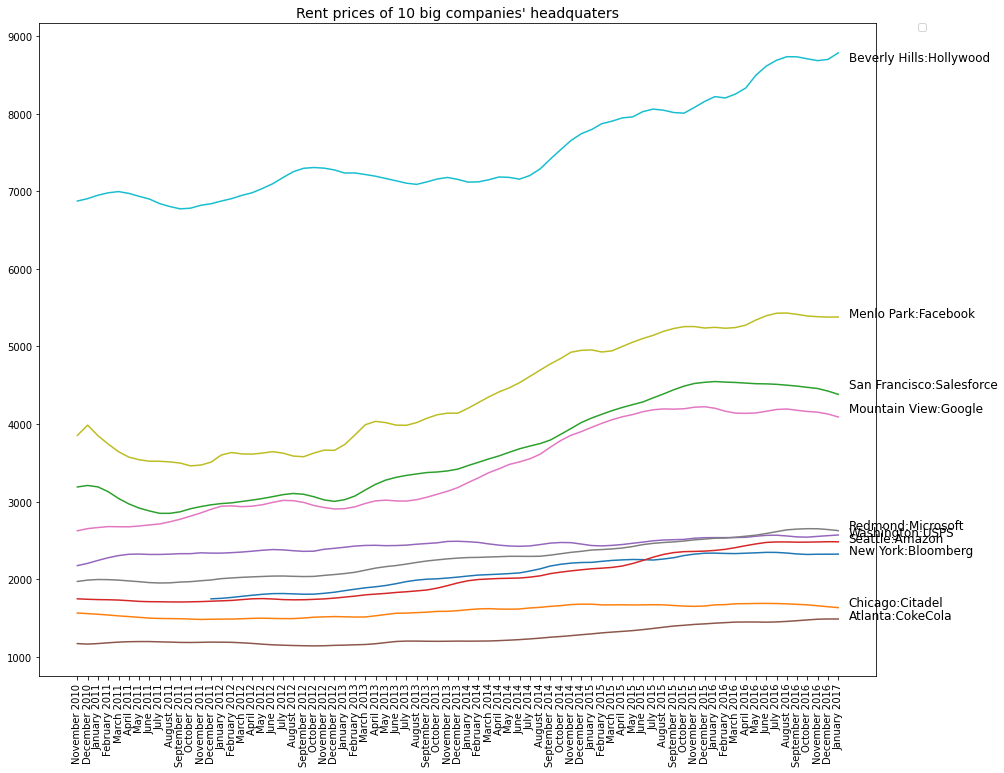

In [ ]:
months = df1.columns[6:]
plt.figure(figsize = (15, 12))

for i in range(10):
    city = cities[i]
    temp_price = city[months]
    plt.plot(months, np.transpose(temp_price))
    plt.text(75, list(temp_price)[-3], city["City"]+':'+ companies1[(city["City"], city["State"])], horizontalalignment='left', size='large', color='black')

               
plt.title("Rent prices of 10 big companies' headquaters", fontsize = 14)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

Beverly Hills has the most expensive rent price among 10 cities. Other 3 California cities (SF, MTV and MPK) follow and have large increase recent years. Seattle, Redmond, Washington and NY's prices almost stay the same. Chicago has relatively low rent price and Atlanta's rent price is the lowest. SF and MTV's prices have the trend to decrease while BH does not.



There are 583 cities in New York Metro


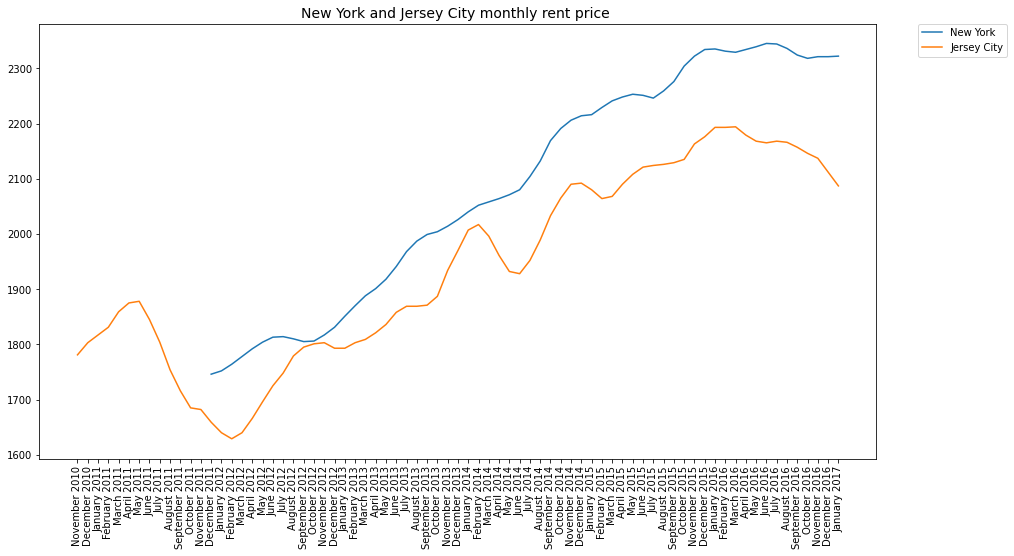

In [ ]:
ny = df1[df1["Metro"] == "New York"]

print("There are {} cities in New York Metro".format(len(ny["City"].unique())))

plt.figure(figsize = (15, 8))
for c in range(583):
    if ny["City"].iloc[c] in ["New York", "Jersey City"]:
        temp_price = ny[ny["City"] == ny["City"].iloc[c]]
        temp_price = temp_price[months]
        plt.plot(temp_price.columns, np.transpose(temp_price.values), label = ny["City"].iloc[c])

plt.title("New York and Jersey City monthly rent price ", fontsize = 14)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

There are 572 cities in New York Metro


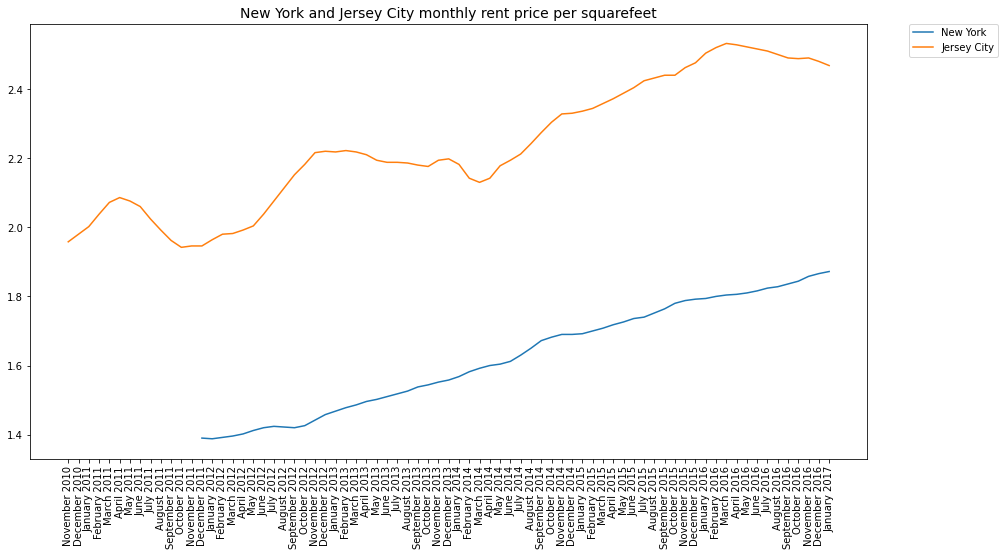

In [ ]:
ny = df2[df2["Metro"] == "New York"]

print("There are {} cities in New York Metro".format(len(ny["City"].unique())))

plt.figure(figsize = (15, 8))
for c in range(583):
    if ny["City"].iloc[c] in ["New York", "Jersey City"]:
        temp_price = ny[ny["City"] == ny["City"].iloc[c]]
        temp_price = temp_price[months]
        plt.plot(temp_price.columns, np.transpose(temp_price.values), label = ny["City"].iloc[c])

plt.title("New York and Jersey City monthly rent price per squarefeet", fontsize = 14)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

# LSTM RNN prediction

## Training and generating models

In [ ]:
from numpy import array
from tensorflow.keras.layers import *
from sklearn.impute import SimpleImputer

In [ ]:
# https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras/
def impute_mean(df_non_cat_type):
  imputer_model_non_cat = SimpleImputer(missing_values=np.nan, strategy='mean')
  imputer_model_non_cat.fit(df_non_cat_type)
  series_non_cat_type = imputer_model_non_cat.transform(df_non_cat_type)
  df_non_cat_type = pd.DataFrame(series_non_cat_type, columns=df_non_cat_type.columns)
  return df_non_cat_type

def impute_null(x_lstm, y_lstm):
  x_lstm = impute_mean(x_lstm)
  y_lstm = impute_mean(y_lstm)
  return x_lstm,y_lstm

def get_time_series_lstm(row):
  #row = df1_2.iloc[1:2,:]
  name = row.iloc[0]['City Code']
  row = row.iloc[:, 7:]
  x = row.transpose().reset_index(drop=True)
  #x.head(10)
  y = x.shift(-1)
  x = x.iloc[0:-2,:]
  y = y.iloc[1:-1,:]
  x, y = impute_null(x, y)
  
  #y.head()
  return array(x).reshape(x.shape[0], 1, x.shape[1]), y, name

def create_train_save_model(x_lstm, y_lstm, name_model):
  model = Sequential()
  model.add(LSTM(x_lstm.shape[0], activation='relu', input_shape=(1, 1)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  model.fit(x_lstm, y_lstm, epochs=200, validation_split=0.2, batch_size=5, verbose=0)
  model.save(f'/content/drive/My Drive/Colab/model/{name_model}')

In [ ]:
max_row_offset = df2.shape[0] - 2
for i in range(max_row_offset):
  x_lstm, y_lstm, name_model = get_time_series_lstm(df2.iloc[i+1:i+2,:])
  #y_lstm.head()
  create_train_save_model(x_lstm, y_lstm, name_model)

#x_lstm


INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab/model/12447/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab/model/17426/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab/model/39051/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab/model/13271/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab/model/40326/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab/model/18959/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab/model/6915/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab/model/54296/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab/model/38128/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab/model/33839/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab/model/25290/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab/model/20330/

## Test

In [ ]:
x_test, y_test, name_model = get_time_series_lstm(df2.iloc[1:2,:])
#test_input = array([30])
#test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(x_test, verbose=0)
print(test_output[1:5,:])
print(y_test[1:5])

[[1.6981739]
 [1.699836 ]
 [1.7031623]
 [1.7048265]]
       1
1  1.586
2  1.588
3  1.590
4  1.594


## Prediction


The price of the 3116 squared feet house in city `San Jose, CA` may be:

USD7040


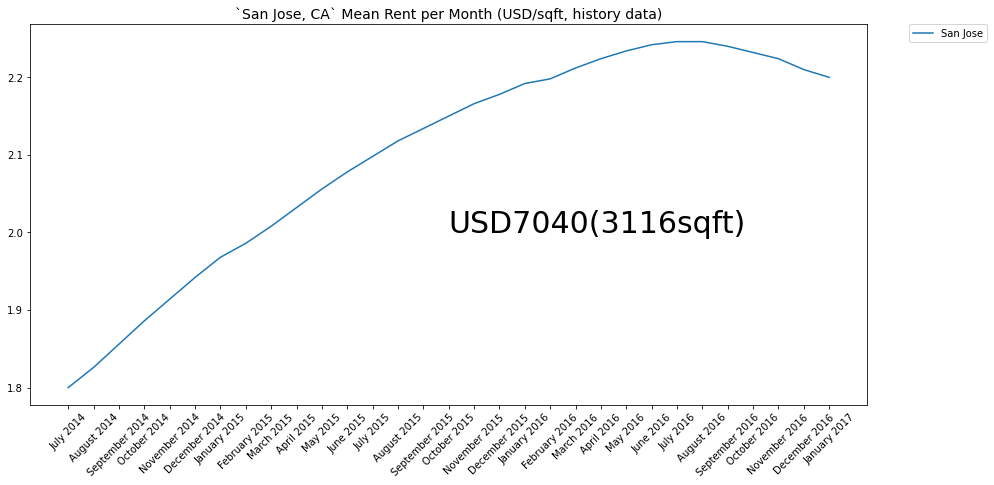

In [ ]:
City = "San Jose" #@param {type:"string"}
State = "CA" #@param ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "DC", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"] {allow-input: true}
Size_in_sqft = 3116 #@param {type:"slider", min:1000, max:10000, step:1}
#def obtain_x(city_code):
from tensorflow.keras.models import *
#city_code = 33839 # San Jose

x_predict = df2.loc[(df2['City'] == City) & (df2['State'] == State)]

if x_predict.shape[0] < 1:
  print(f'We do\'nt have data for the City {City},{State}')
else:
  city_code = x_predict.iloc[0]['City Code']
  model = load_model(f'/content/drive/My Drive/Colab/model/{city_code}/')

  x_predict_lstm,_,_ = get_time_series_lstm(x_predict)
  price_per_sqft = model.predict(x_predict_lstm)[-1][0]
  print()
  print(f'The price of the {Size_in_sqft} squared feet house in city `{City}, {State}` may be:')
  print()
  final_usd = f'USD{int(price_per_sqft * Size_in_sqft)}'
  print(final_usd)

  months = x_predict.columns[50:]

  plt.figure(figsize = (15, 7))

  temp_price = x_predict[months]
  plt.plot(months, np.nanmean(temp_price, axis = 0), label = City)
  plt.text(15, 2, f'{final_usd}({Size_in_sqft}sqft)', fontsize=30)
  plt.title(f"`{City}, {State}` Mean Rent per Month (USD/sqft, history data)", fontsize = 14)
  plt.xticks(rotation = 45)
  plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
  plt.show()
  